# Applying Autoencoders to Gene Expression data from TCGA (MLB Lab)

In [1]:
repo_path = r"Y:\qiu-lab\Bridget\data\exp\exp_allpts_allgenes.pkl"
import pickle
f = open(repo_path, 'rb') # open mode must be 'rb' for reading or 'wb' for writing pickle files!
data = pickle.load(f)
f.close()

In [2]:
data.head()

site,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
TCGA-OR-A5JG-01A-11R-A29S-07,0.000000,9.719740,12.015088,0.0,11.983054,12.657380,0.000000,5.291540,15.164170,7.336301,...,0.0,0.000000,0.0,8.810733,8.622226,13.671000,8.092552,0.0,7.582114,0.000000
TCGA-OR-A5LG-01A-11R-A29S-07,0.000000,7.954506,13.157183,0.0,11.205067,12.162185,0.000000,0.000000,15.071660,6.516067,...,0.0,5.115679,0.0,9.375899,0.000000,13.102174,8.059956,0.0,9.040772,0.000000
TCGA-PK-A5H9-01A-11R-A29S-07,0.000000,8.711008,11.614669,0.0,11.088125,13.594347,0.000000,5.537840,14.014239,10.355674,...,0.0,4.800096,0.0,8.141988,0.000000,13.169551,8.052287,0.0,8.830604,0.000000
TCGA-OR-A5J5-01A-11R-A29S-07,7.748258,9.423506,13.053768,0.0,11.065540,12.774002,0.000000,5.619878,14.264850,6.973192,...,0.0,0.000000,0.0,10.238985,8.258911,13.535513,8.316883,0.0,9.684488,0.000000
TCGA-OR-A5LN-01A-11R-A29S-07,0.000000,6.645924,12.709901,0.0,10.992328,13.520740,8.444644,0.000000,14.689312,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,12.693491,8.665420,0.0,9.844140,6.893664


### 1. Z-Score Based Outlier Removal

In [5]:
from scipy import stats
import numpy as np
data_transposed = data.T
non_outlier_data_transposed = data_transposed[(np.abs(stats.zscore(data_transposed)) < 3).all(axis=1)] #Absolute z-score < 3
non_outlier_data = non_outlier_data_transposed.T
non_outlier_data.shape

(11093, 60341)

### 2.i Missing Values Ratio: Remove columns (features) with greater than 20% nan samples

In [6]:
non_outlier_data.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command

feature_nan_threshold = int((non_outlier_data.shape[0]/5)) #20% of the samples are nan

#All columns with nan values in more than 20% of samples are removed
less_nan_features_data = non_outlier_data.dropna(thresh=len(non_outlier_data) - feature_nan_threshold, axis=1) 
less_nan_features_data.shape

(11093, 23965)

### 2.ii Missing Values Ratio: Remove rows (samples) with greater than 20% nan features

In [7]:
sample_nan_threshold = int((less_nan_features_data.shape[1]/5)) #20% of the features are nan

#All rows with nan values in more than 20% of features are removed
less_nan_features_samples_data = less_nan_features_data.dropna(thresh=len(less_nan_features_data) - sample_nan_threshold, axis=0) 
less_nan_features_samples_data.shape

(11093, 23965)

### 2.iii. Missing Values Ratio: Removing all rows and columns with complete nan elements

In [10]:
less_nan_features_samples_data.dropna(how='all',axis=1,inplace=True) #Removing columns with all nan rows
less_nan_data = less_nan_features_samples_data.dropna(how='all') #Removing rows with all nan columns
less_nan_features_data.shape, less_nan_data.shape

((11093, 23965), (11093, 23965))

### 3. Normalizing the Data and filling in nan values -  before identifying most variable genes

In [11]:
less_nan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11093 entries, TCGA-OR-A5JG-01A-11R-A29S-07 to TCGA-V4-A9F8-01A-11R-A405-07
Columns: 23965 entries, ENSG00000167578.15 to ENSG00000123685.7
dtypes: float64(23965)
memory usage: 2.0+ GB


Why Minmax over Standard -> Normalize the data and preserve orginal distribution (Scale it down)

In [12]:
from sklearn.preprocessing import MinMaxScaler
feature_list = less_nan_data.columns.tolist()
scaler = MinMaxScaler(feature_range=(0,1))
less_nan_data[feature_list] = scaler.fit_transform(less_nan_data[feature_list])
normalized_data = less_nan_data.fillna(less_nan_data.mean())

### 4. 5000 Most Variable Genes using Mean Absolute Deviation

In [13]:
most_variable_genes = normalized_data.mad(axis = 0).nlargest(5000, keep='all').index.values.tolist()
#Subseting the genes from mvg_v3_df that are on the most_variable_genes list
mvg_df = normalized_data[most_variable_genes]
mvg_df.shape

(11093, 5000)

### START FROM HERE IF MVG ALREADY CREATED

In [ ]:
mvg_df.to_csv("5000_mvg_ge.csv")
mvg_df = pd.read_csv("5000_mvg_ge.csv", index_col=0) 
mvg_df.shape

In [14]:
mvg_df.head()

site,ENSG00000137648.15,ENSG00000188959.9,ENSG00000275410.3,ENSG00000176153.11,ENSG00000101076.15,ENSG00000129514.5,ENSG00000132698.12,ENSG00000006611.14,ENSG00000083307.9,ENSG00000135100.16,...,ENSG00000257647.1,ENSG00000130066.15,ENSG00000278828.1,ENSG00000250410.1,ENSG00000275759.1,ENSG00000278743.1,ENSG00000238078.1,ENSG00000166831.7,ENSG00000070019.4,ENSG00000265982.1
TCGA-OR-A5JG-01A-11R-A29S-07,0.073500,0.229669,0.461616,0.160769,0.420117,0.530802,0.076940,0.351457,0.655687,0.181077,...,0.296175,0.346695,0.700264,0.422999,0.372860,0.445587,0.539605,0.226002,0.262487,0.340354
TCGA-OR-A5LG-01A-11R-A29S-07,0.194632,0.498101,0.461616,0.247016,0.337648,0.071162,0.289341,0.477402,0.080321,0.413669,...,0.410805,0.451556,0.505616,0.541395,0.691559,0.456051,0.409564,0.700091,0.115698,0.324174
TCGA-PK-A5H9-01A-11R-A29S-07,0.522385,0.498101,0.461616,0.246062,0.823321,0.205886,0.038189,0.817311,0.655687,0.854132,...,0.243543,0.487043,0.560803,0.317076,0.554549,0.345342,0.070219,0.490721,0.454180,0.438769
TCGA-OR-A5J5-01A-11R-A29S-07,0.522385,0.388295,0.182258,0.186049,0.267448,0.166319,0.166027,0.375540,0.286661,0.413669,...,0.378083,0.506766,0.733571,0.748093,0.582290,0.408478,0.529792,0.612384,0.354628,0.521032
TCGA-OR-A5LN-01A-11R-A29S-07,0.522385,0.498101,0.222362,0.199751,0.214770,0.530802,0.647215,0.477402,0.655687,0.413669,...,0.308337,0.549295,0.495256,0.403971,0.723090,0.408601,0.362988,0.490954,0.198759,0.540795


### 5. Building a Vanilla Autoencoder

In [15]:
import os
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

from keras import backend as K #For explicitly \adjusting the learning rate


In [16]:
X_train, X_val = train_test_split(mvg_df, test_size=0.2, random_state = seed(77))

In [17]:
ncol = mvg_df.shape[1] #Input Feature Number
encoding_dim = 100 #Nodes in Bottleneck layer

#Network configuration
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(500, activation = 'relu')(input_dim)
encoded2 = Dense(encoding_dim, activation = 'relu')(encoded1)

# Decoder Layers
decoded1 = Dense(500, activation = 'relu')(encoded2)
decoded2 = Dense(ncol, activation = 'sigmoid')(decoded1) #Applying sigmoid activation on the output layer ensure input also belongs to (0,1)

In [18]:
# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded2)

# Compile the Model
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')#Should try Pseudo-Heuber Loss, Binary Crossentropy 
#adam - stochastic gradient descent algorithm
K.set_value(autoencoder.optimizer.learning_rate, 0.0001) #Setting the learning rate to 10^-3

In [19]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5000)]            0         
                                                                 
 dense (Dense)               (None, 500)               2500500   
                                                                 
 dense_1 (Dense)             (None, 100)               50100     
                                                                 
 dense_2 (Dense)             (None, 500)               50500     
                                                                 
 dense_3 (Dense)             (None, 5000)              2505000   
                                                                 
Total params: 5,106,100
Trainable params: 5,106,100
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = autoencoder.fit(X_train, X_train, epochs = 200, batch_size = 256, shuffle = False, verbose = 1, validation_data = (X_val, X_val))

Epoch 1/200
35/35 [==============================] - 2s 25ms/step - loss: 0.0333 - val_loss: 0.0284
Epoch 2/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0270 - val_loss: 0.0259
Epoch 3/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0242 - val_loss: 0.0229
Epoch 4/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0217 - val_loss: 0.0206
Epoch 5/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0195 - val_loss: 0.0186
Epoch 6/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0178 - val_loss: 0.0172
Epoch 7/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0166 - val_loss: 0.0162
Epoch 8/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0157 - val_loss: 0.0154
Epoch 9/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0151 - val_loss: 0.0149
Epoch 10/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0147 - val_loss: 0.0145

35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 163/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 164/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 165/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 166/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 167/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 168/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 169/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 170/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0.0097
Epoch 171/200
35/35 [==============================] - 0s 12ms/step - loss: 0.0093 - val_loss: 0

dict_keys(['loss', 'val_loss'])


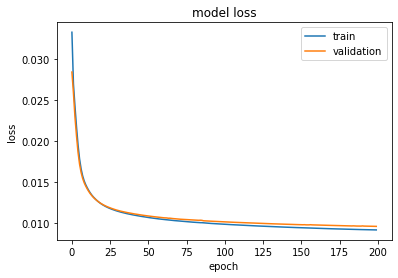

In [21]:
#Visualizing the Loss over epochs
print(history.history.keys())
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [22]:
# # Plot history: Accuracy
# plt.plot(history.history['val_accuracy'])
# plt.title('Validation accuracy history')
# plt.ylabel('Accuracy value (%)')
# plt.xlabel('No. epoch')
# plt.show()

In [23]:
#Obtain the reduced data
encoder = Model(inputs = input_dim, outputs = encoded2)
encoded_input = Input(shape = (encoding_dim, ))

encoded_train = pd.DataFrame(encoder.predict(mvg_df), index=mvg_df.index) #Maintain Index for Mapping to cancer type 
encoded_train = encoded_train.add_prefix('feature_')
encoded_train.shape

(11093, 100)

In [25]:
#output dataset
shape_before_removing_nan = encoded_train.shape
encoded_train.replace(0, np.nan, inplace=True) #Converting all the zero's to nan to use nan command

encoded_train.dropna(how='all',axis=1, inplace=True) #Removing columns with all nan rows
encoded_train.dropna(how='all',axis=0, inplace=True) #Removing rows with all nan columns

encoded_train.replace(np.nan, 0, inplace=True) #Converting all the nan's to zero to be compatible with t-SNE

encoded_train.to_csv("GE_AE_Vanilla_v3.csv", index=True)
encoded_train = pd.read_csv("GE_AE_Vanilla_v3.csv",index_col=0)


In [26]:
shape_before_removing_nan, encoded_train.shape

((11093, 100), (11093, 64))

In [34]:
encoded_train.head()

,feature_3,feature_4,feature_5,feature_6,feature_8,feature_9,feature_13,feature_14,feature_15,feature_16,...,feature_88,feature_89,feature_90,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99
TCGA-OR-A5JG-01A-11R-A29S-07,4.288156,0.000000,2.819612,6.913118,9.131516,9.493444,4.806186,0.0,10.659330,0.0,...,6.703303,4.265094,4.672365,7.812587,8.467202,6.285722,6.026005,8.833585,9.613291,4.881588
TCGA-OR-A5LG-01A-11R-A29S-07,5.396165,0.000000,3.255515,8.984320,7.491915,8.867195,5.294629,0.0,10.980059,0.0,...,4.847618,7.646313,5.204650,7.734666,8.395196,6.544417,4.964673,10.725282,7.941168,3.964512
TCGA-PK-A5H9-01A-11R-A29S-07,5.245347,2.140584,3.488074,11.675856,6.333769,8.185564,5.632490,0.0,6.687215,0.0,...,4.544700,9.814544,4.910468,5.768642,5.845122,4.122860,4.689692,11.258010,9.208426,3.146663
TCGA-OR-A5J5-01A-11R-A29S-07,4.317921,0.000000,4.584525,9.084392,7.734627,10.544629,6.175977,0.0,9.081261,0.0,...,5.611121,4.478390,4.845665,9.018805,9.393173,6.310083,8.281238,12.328259,9.022475,5.124244
TCGA-OR-A5LN-01A-11R-A29S-07,5.126145,0.000000,3.481942,9.726347,6.376473,9.195669,4.903182,0.0,9.113146,0.0,...,6.519267,9.356962,5.426865,6.763529,9.131256,4.294398,4.652905,12.010756,9.636621,3.856457


### 6. Dimension Reduction and Cluster Visualization using t-SNE 


perplexity parameter can be changed based on the input datatset - dataset with larger number of variables requires larger perplexity set this value between 5 and 50 (sklearn documentation) verbose=1 displays run time messages set n_iter sufficiently high to resolve the well stabilized cluster get embeddings


In [27]:
# Perform t-SNE on AE encoded_features

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, init='pca', random_state=0, perplexity=20, learning_rate=300, n_iter=400, verbose=1)
#TSNE(n_components=2, perplexity=105, n_iter=1000, verbose=1).fit_transform(encoded_train)
tsne_out = tsne.fit_transform(encoded_train)
tsne_components = pd.DataFrame(tsne_out, index =encoded_train.index ) #Maintain Index


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 11093 samples in 0.001s...
[t-SNE] Computed neighbors for 11093 samples in 3.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11093
[t-SNE] Computed conditional probabilities for sample 2000 / 11093
[t-SNE] Computed conditional probabilities for sample 3000 / 11093
[t-SNE] Computed conditional probabilities for sample 4000 / 11093
[t-SNE] Computed conditional probabilities for sample 5000 / 11093
[t-SNE] Computed conditional probabilities for sample 6000 / 11093
[t-SNE] Computed conditional probabilities for sample 7000 / 11093
[t-SNE] Computed conditional probabilities for sample 8000 / 11093
[t-SNE] Computed conditional probabilities for sample 9000 / 11093
[t-SNE] Computed conditional probabilities for sample 10000 / 11093
[t-SNE] Computed conditional probabilities for sample 11000 / 11093
[t-SNE] Computed conditional probabilities for sample 11093 / 11093
[t-SNE] Mean sigma: 2.991653


C:\Users\ssrikrishnan6\Anaconda3\envs\metalearning\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.855240
[t-SNE] KL divergence after 400 iterations: 1.923770


In [28]:
tsne_components.head()

,0,1
TCGA-OR-A5JG-01A-11R-A29S-07,28.506863,15.564904
TCGA-OR-A5LG-01A-11R-A29S-07,27.470905,14.203460
TCGA-PK-A5H9-01A-11R-A29S-07,27.001217,13.344229
TCGA-OR-A5J5-01A-11R-A29S-07,29.024504,15.272785
TCGA-OR-A5LN-01A-11R-A29S-07,27.207821,14.223763


### 7. Mapping samples to cancer type


In [29]:
import pandas as pd
patient_metadata = pd.read_csv(r"C:\Users\ssrikrishnan6\ae_integration\info_all_ex.txt", sep = "\t")
patient_metadata = patient_metadata[[ 'cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id','cases.0.project.project_id','cases.0.samples.0.sample_type']] #tolist()
patient_metadata.rename(columns={'cases.0.project.project_id': "cancer_type", "cases.0.samples.0.portions.0.analytes.0.aliquots.0.submitter_id":"tcga_id"},inplace=True)
patient_metadata.set_index("tcga_id", inplace=True)
patient_metadata

,cancer_type,cases.0.samples.0.sample_type
tcga_id,,
TCGA-NC-A5HI-01A-11R-A26W-07,TCGA-LUSC,Primary Tumor
TCGA-68-8251-01A-11R-2296-07,TCGA-LUSC,Primary Tumor
TCGA-98-A53A-01A-11R-A262-07,TCGA-LUSC,Primary Tumor
TCGA-39-5029-01A-01R-1443-07,TCGA-LUSC,Primary Tumor
TCGA-22-5474-01A-01R-1635-07,TCGA-LUSC,Primary Tumor
...,...,...
TCGA-YL-A9WL-01A-11R-A41O-07,TCGA-PRAD,Primary Tumor
TCGA-KK-A5A1-01A-11R-A29R-07,TCGA-PRAD,Primary Tumor
TCGA-HU-A4H6-01A-11R-A251-31,TCGA-STAD,Primary Tumor


In [30]:
grouped_tsne = pd.merge(tsne_components , patient_metadata['cancer_type'] , left_index=True, right_index=True)
grouped_tsne.head()
grouped_tsne.to_csv("tsne_ge_vanilla_ae.csv")

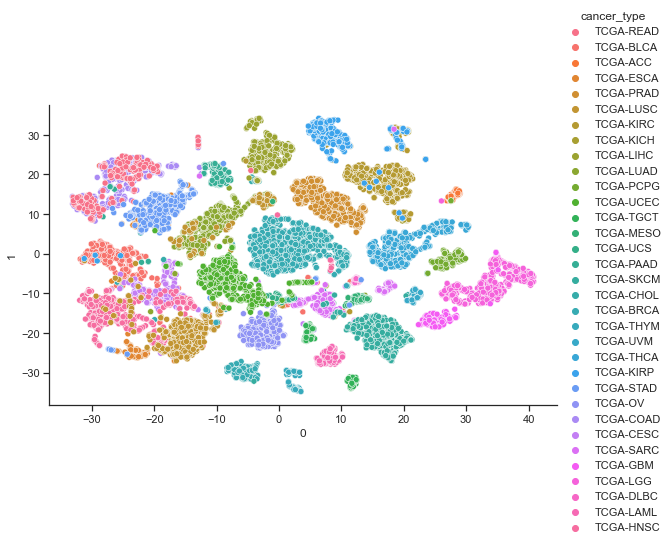

In [31]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set(style='ticks')

cancer_types = grouped_tsne['cancer_type'].tolist()
cancer_types = list(set(cancer_types))

seaborn.relplot(data=grouped_tsne, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
plt.show()

Relplot = A figure-level function for visualizing statistical relationships using two common approaches: scatter plots and line plots. relplot() combines a FacetGrid with one of two axes-level functions: scatterplot() (with kind="scatter" ; the default)

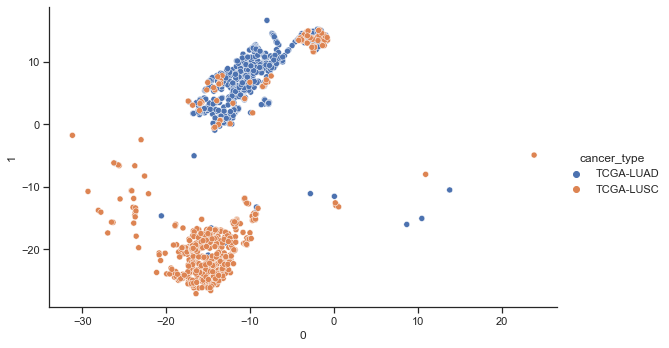

In [32]:
lung_cancer_types = ["TCGA-LUAD","TCGA-LUSC"] 
lung_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_cancer_types)]

seaborn.relplot(data=lung_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_cancer_types, aspect=1.61)
plt.show()

In [1]:
lung_breast_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] 
lung_breast_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(lung_breast_cancer_types)]

seaborn.relplot(data=lung_breast_cancer_df, x=0, y=1, hue='cancer_type', hue_order=lung_breast_cancer_types, aspect=1.61)
plt.show()

NameError: name 'grouped_tsne' is not defined

In [ ]:
subset_cancer_types = ["TCGA-LUAD","TCGA-BRCA"] #Enter Cancer type here
subset_cancer_df = grouped_tsne[grouped_tsne['cancer_type'].isin(subset_cancer_types)]

seaborn.relplot(data=subset_cancer_df, x=0, y=1, hue='cancer_type', hue_order=subset_cancer_types, aspect=1.61)
plt.show()

### 7. Visualization and Clustering using UMAP

Install umap: !pip3 install umap-learn

In [ ]:
# import umap.umap_ as umap
# reducer = umap.UMAP()
# embedding = reducer.fit_transform(encoded_train)
# umap_components = pd.DataFrame(embedding)
# umap_components.head()

In [ ]:
# grouped_umap = pd.merge(umap_components , patient_metadata['cases.0.project.project_id'] , left_index=True, right_index=True)
# grouped_umap.rename(columns={'cases.0.project.project_id': "cancer_type"},inplace=True)
# grouped_umap.head()

In [ ]:
# seaborn.set(style='ticks')
# cancer_types = grouped_umap['cancer_type'].tolist()
# cancer_types = list(set(cancer_types))

# seaborn.relplot(data=grouped_umap, x=0, y=1, hue='cancer_type', hue_order=cancer_types, aspect=1.61)
# plt.show()